**Objective:** The goal of this project is to create a Python script that will compare composition between two microbial communities (using Jaccard similarity). I then aim to visually represent this similarity in a proportional Venn diagram figure.  
**Outcomes:** I want the script to output a Jaccard index value (a number value to quantify beta diversity of the two microbial communities), and I also want it to create a visual representation of the overlap in similarity. This figure will look like a proportional Venn diagram (see Figure 1 below for a conceptual drawing of how it might appear).  
  
<img src="venndiagram.jpg" alt="sketch_image" width="400"/>

In [2]:
# Calculates Jaccard index between two microbial communities
import glob
import matplotlib.pyplot as plt

In [3]:
root = '/Users/HP/Desktop/Coding'
dataset_dir = root + '/introcoding-spring-2019/Datasets/'
glob.os.chdir(dataset_dir)
a = open('microbial_community_a.txt').read().split('\n')
b = open('microbial_community_b.txt').read().split('\n')

In [4]:
# Determine how many members are shared between the two sets
shared_OTUs = set(a) & set(b)
number_shared_OTUs = len(shared_OTUs)

In [5]:
# Calculates total number of elements in both lists
total_OTUs = len(a) + len(b)

In [6]:
Jaccard = number_shared_OTUs / total_OTUs
#print(Jaccard)

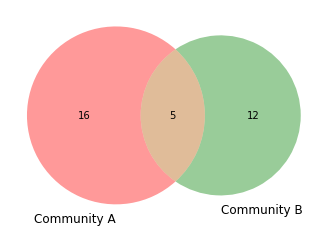

In [7]:
from matplotlib_venn import venn2
venn2(subsets = (len(a), len(b), len(shared_OTUs)), set_labels=('Community A', 'Community B'))

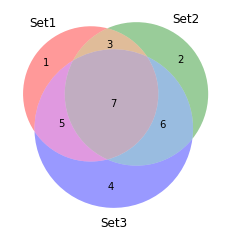

In [8]:
from matplotlib_venn import venn3
venn3(subsets = (1, 2, 3, 4, 5, 6, 7), set_labels = ('Set1', 'Set2', 'Set3'))

Text(0.5, 1.0, '$\\frac{|A \\cap B|}{|A \\cup B|}$')

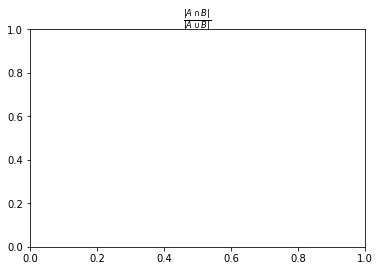

In [29]:
plt.title(r'$\frac{|A \cap B|}{|A \cup B|}$')